# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Import Libraries</p>

In [29]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

from IPython.display import display

warnings.simplefilter("ignore")

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Load data</p>

In [2]:
df = pd.read_csv("../aquarium-dataset/train/_annotations.csv")
df = shuffle(df)
df.head()

filename  width  height  \
2740  IMG_2394_jpeg_jpg.rf.3994f29b2f24a3104ed340461...    768    1024   
1931  IMG_8517_MOV-1_jpg.rf.f38c10686e4a0e257b1f2d8f...   1024     576   
1904  IMG_8463_jpg.rf.f389f79adb1c5954105342441c2893...   1024     768   
1270  IMG_8594_jpg.rf.c5476deec8c02b1ed2d106d5bb1a88...   1024     768   
21    IMG_3131_jpeg_jpg.rf.fcf0ccd8dbf187344da242e29...    768    1024   

          class  xmin  ymin  xmax  ymax  
2740       fish     0   223    21   303  
1931       fish   895    37  1023   175  
1904       fish   525   249   616   352  
1270  jellyfish   293    18   365   171  
21       puffin   662   254   710   340

<div style="border-radius:10px; border:#f79a05 solid; padding: 15px; background-color: #f5d77f; font-size:100%; text-align:left">
    
 * This dataset is mostly a practice and training aspect for the subject of YOLO. The data is labeled with 5 classes.
 * classic_id labels: 'car', 'truck', 'pedestrian', 'bicyclist', 'light'

In [5]:
df.columns

Index(['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'], dtype='object')

In [6]:
classes = df["class"].unique()
print(classes)

['fish' 'jellyfish' 'puffin' 'penguin' 'shark' 'stingray' 'starfish']


In [8]:
# labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

# Map df['class'].unique() to a dictionary of integers
labels = {(v + 1): k for v, k in enumerate(df["class"].unique())}
labels

{1: 'fish',
 2: 'jellyfish',
 3: 'puffin',
 4: 'penguin',
 5: 'shark',
 6: 'stingray',
 7: 'starfish'}

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Show some labeled images</p>

In [12]:
# Get path images and boxes (x,y) for each class
boxes = {}
images = {}

base_path = "../aquarium-dataset/train/"

for class_id in classes:
    first_row = df[df["class"] == class_id].iloc[0]

    images[class_id] = cv2.imread(base_path + first_row["filename"])
    boxes[class_id] = [
        first_row["xmin"],
        first_row["xmax"],
        first_row["ymin"],
        first_row["ymax"],
    ]

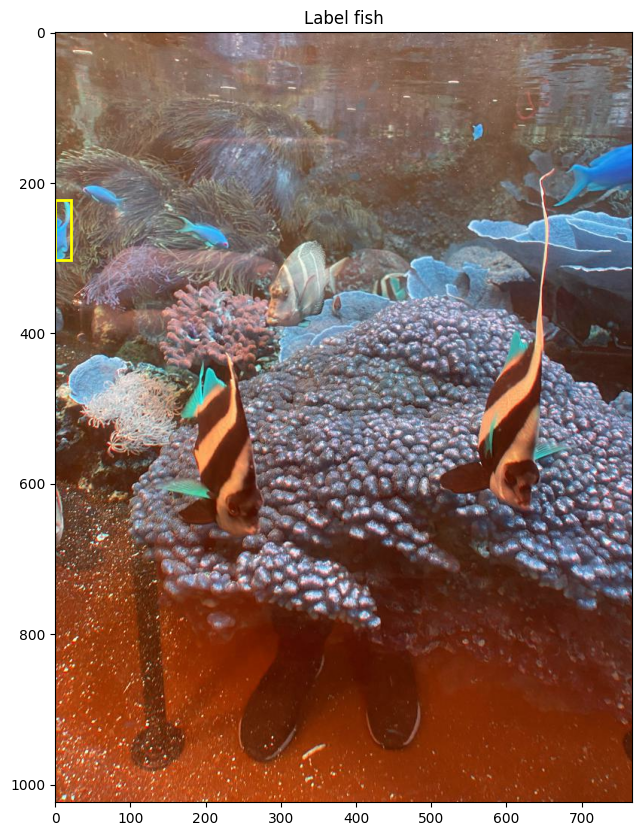

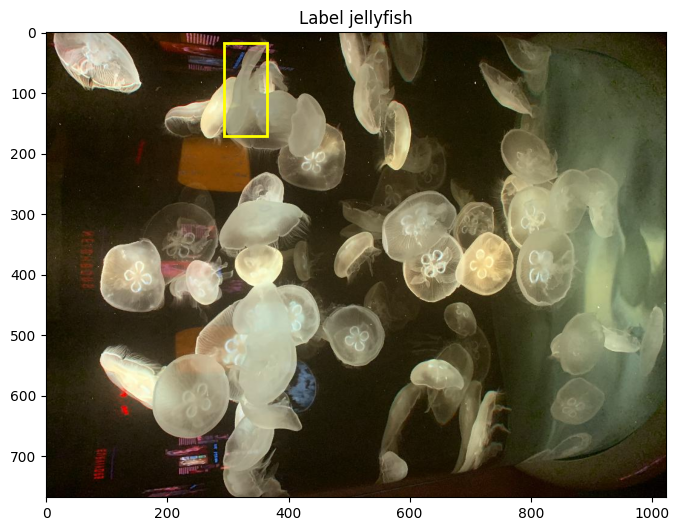

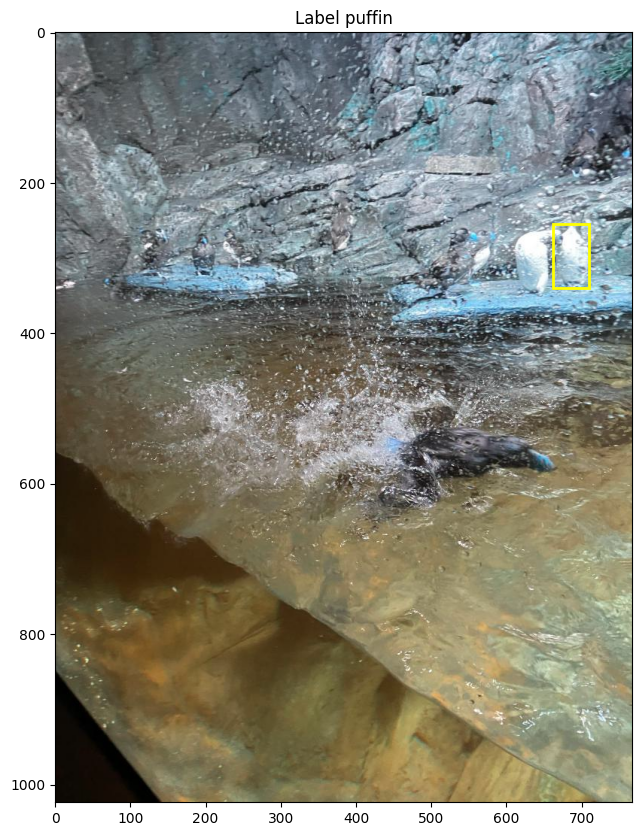

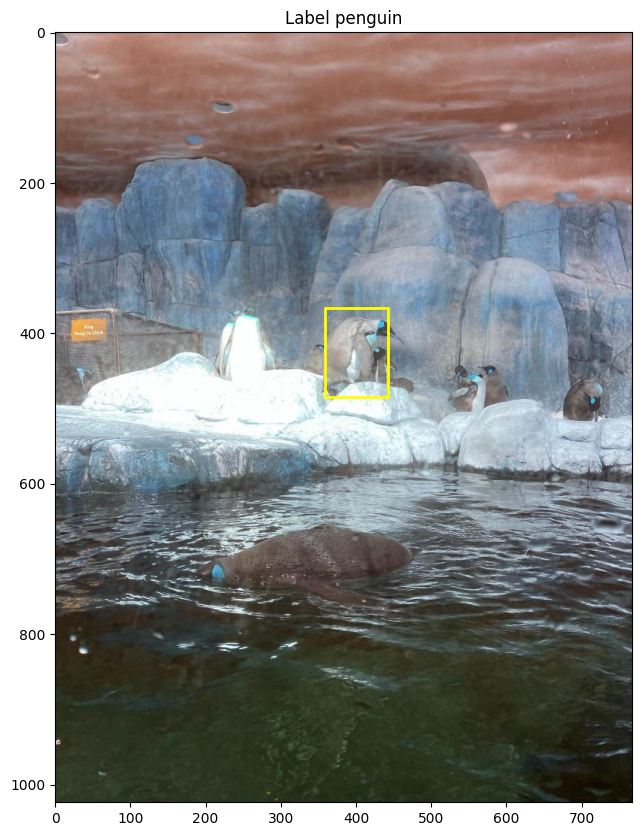

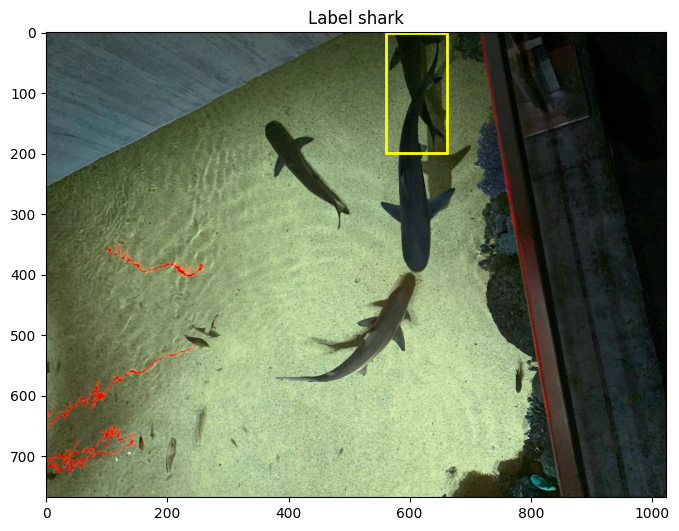

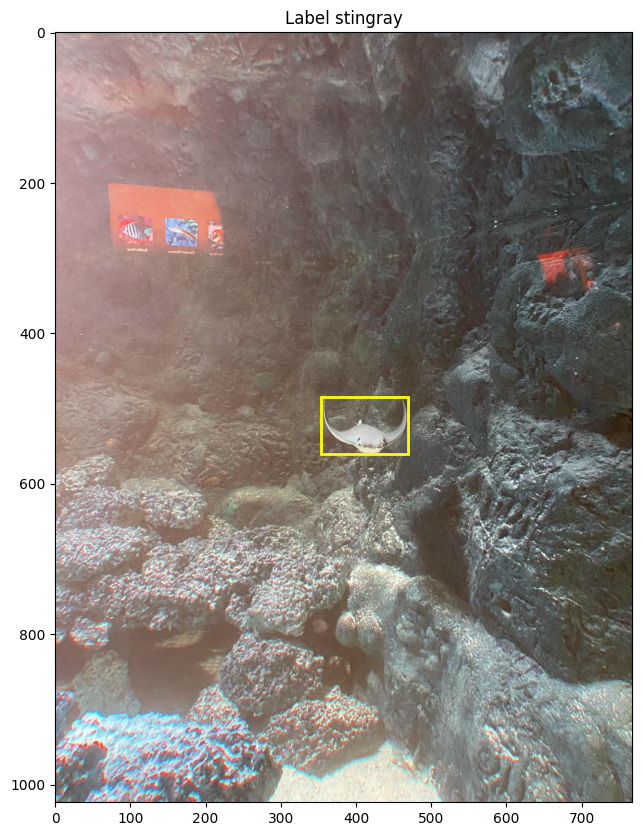

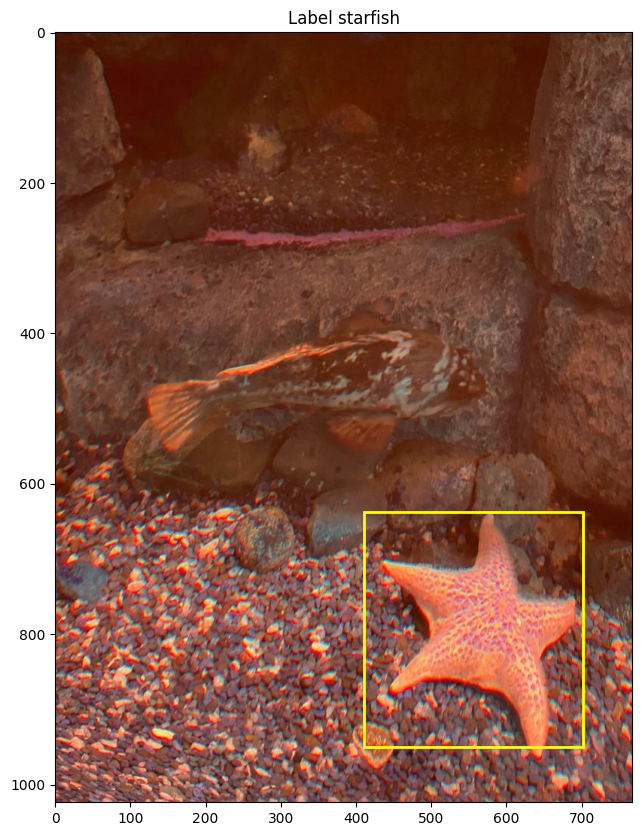

In [16]:
for n, i in enumerate(classes):

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[n+1])
    plt.imshow(images[i])
    plt.gca().add_patch(
        plt.Rectangle(
            (xmin, ymin),
            xmax - xmin,
            ymax - ymin,
            color="yellow",
            fill=False,
            linewidth=2,
        )
    )

    plt.show()

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Model</p>

In [18]:
!pip install -qU ultralytics

In [19]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

In [20]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:01<00:00, 35.3MB/s]


In [22]:
results = model.predict(
    source="../aquarium-dataset/test/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg",
    save=True,
    conf=0.2,
    iou=0.5,
)


image 1/1 /Users/odai/cs5567-final-project/part-b1/../aquarium-dataset/test/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg: 640x480 1 bird, 370.4ms
Speed: 26.3ms preprocess, 370.4ms inference, 238.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /Users/odai/vascular-herbarium-yolo/runs/detect/predict


In [23]:
result = results[0]
box = result.boxes[0]

In [24]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [25]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 14.0
Coordinates: [149.6294403076172, 482.26727294921875, 540.8052978515625, 726.4465942382812]
Probability: 0.957122802734375


In [26]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: bird
Coordinates: [150, 482, 541, 726]
Probability: 0.96
---


In [28]:
results1 = model.predict(
    source="../aquarium-dataset/test/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg",
    save=True,
    conf=0.2,
    iou=0.5,
)

Results = results1[0]


image 1/1 /Users/odai/cs5567-final-project/part-b1/../aquarium-dataset/test/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg: 640x480 1 bird, 269.9ms
Speed: 2.9ms preprocess, 269.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /Users/odai/vascular-herbarium-yolo/runs/detect/predict


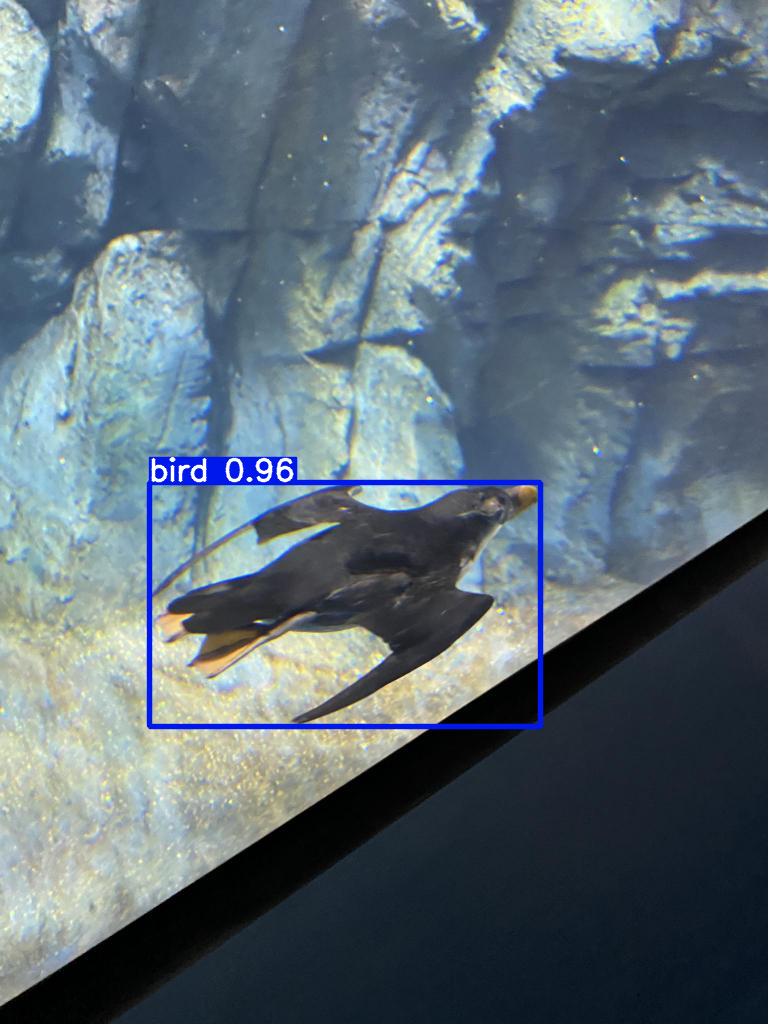

In [35]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))